In [1]:
from qiskit import *
from qiskit.visualization import plot_histogram, plot_bloch_multivector, plot_state_qsphere

In [123]:
def before_oracle(circuit, qbits):
#     circuit.x(qbits[0])
    circuit.x(qbits[1])
    circuit.barrier()

    circuit.h(qbits[0])
    circuit.h(qbits[1])
    circuit.barrier()
    
    return circuit

In [124]:
def after_oracle(circuit, qbits, cbits):
    circuit.h(qbits[0])
    circuit.h(qbits[1])
    
    return circuit

In [125]:
# Black Box! (Refer Microsoft vids)
def oracle_function(circuit, qbits):
#     circuit.cx(qbits[0], qbits[1])
    circuit.x(qbits[1])
    circuit.barrier()
    return circuit

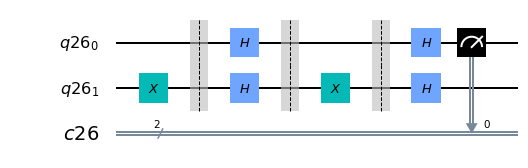

In [127]:
qr = QuantumRegister(2)
cr = ClassicalRegister(2)
circuit = QuantumCircuit(qr, cr)

# Before oracle function
before_oracle(circuit, qr)

# Oracale function here!
oracle_function(circuit, qr)

# After oracle function
after_oracle(circuit, qr, cr)
circuit.measure(qr[0], cr[0])


circuit.draw('mpl')

{'00': 1024}


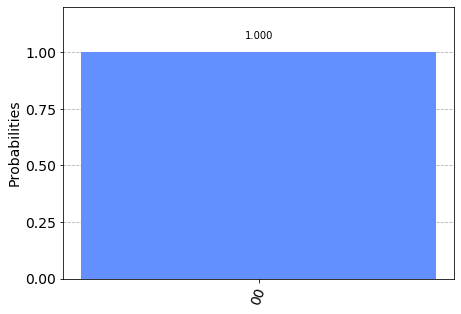

In [136]:
backend = Aer.get_backend('qasm_simulator')
results = execute(circuit, backend, shots = 1024).result()
counts = results.get_counts()
print(counts)
plot_histogram(counts)